<a href="https://colab.research.google.com/github/Lupin3-droid/Lupin3-droid/blob/main/Customer_satisfaction_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import os

DEMOGRAPHICS

In [ ]:
data=pd.read_csv('/content/cdata.csv')

In [ ]:
data.head()

,record_id,redcap_survey_identifier,customer_satisfaction_survey_timestamp,gen,yrs,role___1,role___2,role___3,role___4,role___5,...,qms_sens___5,qms_sens___6,qms_sens___7,compli,risk,mon_sdc,cus_comp,effe,add_sup,customer_satisfaction_survey_complete
0,1,NaN,2024-03-27 12:31:36,2.0,1.0,0,0,0,0,0,...,0,0,0,1.0,2.0,1.0,2.0,1.0,NaN,2
1,2,NaN,2024-04-29 08:17:31,2.0,4.0,0,0,1,0,0,...,1,1,1,1.0,1.0,1.0,1.0,1.0,NaN,2
2,3,NaN,2024-04-29 08:51:46,2.0,4.0,0,0,1,1,0,...,1,1,0,1.0,1.0,1.0,1.0,1.0,NaN,2
3,4,NaN,2024-04-29 10:43:02,2.0,2.0,0,1,0,0,0,...,0,0,0,2.0,2.0,2.0,2.0,2.0,Closely guide the department on specific depar...,2
4,5,NaN,2024-04-29 11:30:39,2.0,4.0,0,0,1,0,0,...,1,1,1,2.0,1.0,1.0,2.0,2.0,They need to also be on the ground just like t...,2


In [ ]:
data.drop(columns=["record_id","redcap_survey_identifier","customer_satisfaction_survey_timestamp"],inplace=True)
# Removed extra tab character from column name

In [ ]:
data.head()

,gen,yrs,role___1,role___2,role___3,role___4,role___5,role___6,dir,qaser___1,...,qms_sens___5,qms_sens___6,qms_sens___7,compli,risk,mon_sdc,cus_comp,effe,add_sup,customer_satisfaction_survey_complete
0,2.0,1.0,0,0,0,0,0,1,2.0,0,...,0,0,0,1.0,2.0,1.0,2.0,1.0,NaN,2
1,2.0,4.0,0,0,1,0,0,0,1.0,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,NaN,2
2,2.0,4.0,0,0,1,1,0,1,1.0,1,...,1,1,0,1.0,1.0,1.0,1.0,1.0,NaN,2
3,2.0,2.0,0,1,0,0,0,0,1.0,1,...,0,0,0,2.0,2.0,2.0,2.0,2.0,Closely guide the department on specific depar...,2
4,2.0,4.0,0,0,1,0,0,0,1.0,0,...,1,1,1,2.0,1.0,1.0,2.0,2.0,They need to also be on the ground just like t...,2


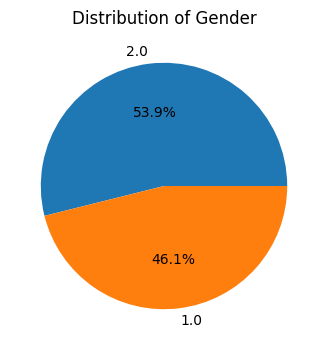

In [ ]:
gen_counts = data['gen'].value_counts()

# Create the pie chart using the counts
plt.figure(figsize=(4, 4))
plt.pie(gen_counts, labels=gen_counts.index, autopct='%1.1f%%')  # Use labels and display percentages
plt.title('Distribution of Gender')  # Add a title
plt.show()

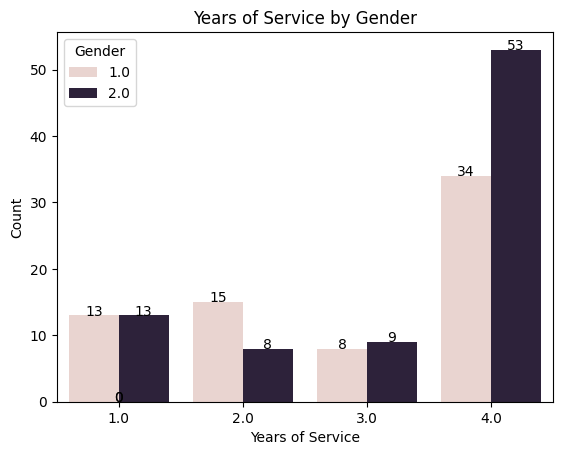

In [ ]:
#plot year of service of employees by gender.
sns.countplot(x='yrs',hue='gen',data=data)
# Add value labels to each bar
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',)

plt.title('Years of Service by Gender')
plt.xlabel('Years of Service')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [ ]:
#creating a dataset for the roles for each respondent.
roledts=data[["gen","role___1","role___2","role___3","role___4","role___5","role___6"]]
roledts.head()

,gen,role___1,role___2,role___3,role___4,role___5,role___6
0,2.0,0,0,0,0,0,1
1,2.0,0,0,1,0,0,0
2,2.0,0,0,1,1,0,1
3,2.0,0,1,0,0,0,0
4,2.0,0,0,1,0,0,0


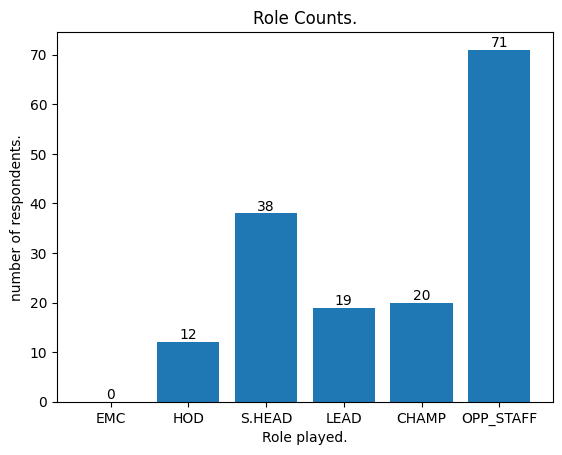

In [ ]:
# bar chart for role count for each role.
role_columns = ['role___1', 'role___2', 'role___3', 'role___4', 'role___5', 'role___6']
roledts.columns=['GEN','EMC','HOD','S.HEAD','LEAD','CHAMP','OPP_STAFF']
# Update role_columns to match the new names
role_columns = ['EMC','HOD','S.HEAD','LEAD','CHAMP','OPP_STAFF'] # Use new column names
role_counts = roledts[role_columns].sum()

plt.bar(role_columns, role_counts)
# Add data labels
for i, count in enumerate(role_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xlabel('Role played.')
plt.ylabel('number of respondents.')
plt.title('Role Counts.')
plt.show()

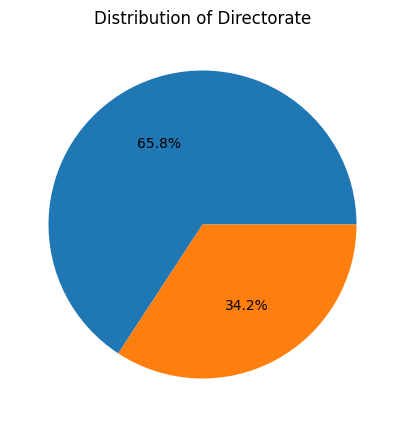

In [ ]:
#pie chart to show which directorate partook the survey.
plt.figure(figsize=(5, 5))
directorate_counts = data['dir'].value_counts()
plt.pie(directorate_counts,autopct='%1.1f%%')
plt.title('Distribution of Directorate')
plt.show()

In [ ]:
#activities intaracted with.
activities=data[["qaser___1","qaser___2","qaser___3","qaser___4","qaser___5","qaser___6","qaser___7","qaser___8","qaser___9"]]
activities.head()

,qaser___1,qaser___2,qaser___3,qaser___4,qaser___5,qaser___6,qaser___7,qaser___8,qaser___9
0,0,0,1,0,1,1,0,0,0
1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,0,0,0
3,1,1,1,1,1,1,1,1,1
4,0,0,0,0,1,0,0,0,1


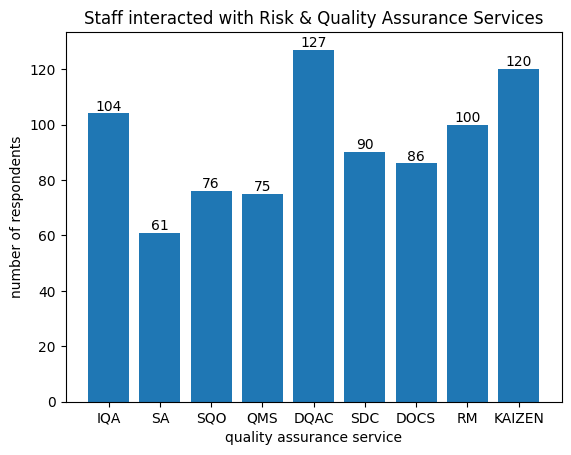

In [ ]:
activities_columns = ["qaser___1","qaser___2","qaser___3","qaser___4","qaser___5","qaser___6","qaser___7","qaser___8","qaser___9"]
# Create a dictionary to map old names to new names
name_mapping = {
    "qaser___1": 'IQA',
    "qaser___2": 'SA',
    "qaser___3": 'SQO',
    "qaser___4": 'QMS',
    "qaser___5": 'DQAC',
    "qaser___6": 'SDC',
    "qaser___7": 'DOCS',
    "qaser___8": 'RM',
    "qaser___9": 'KAIZEN'
}
# Rename the columns using a list comprehension
new_activities_columns = [name_mapping.get(col, col) for col in activities_columns]

activities_counts = activities[activities_columns].sum()

plt.bar(new_activities_columns, activities_counts)
# Add data labels
for i, count in enumerate(activities_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xlabel('quality assurance service')
plt.ylabel('number of respondents')
plt.title('Staff interacted with Risk & Quality Assurance Services')
plt.show();

EVALUATION OF QMS IMPLEMENTATION AND ADVISORY SUPPORT.

In [ ]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gen                                    154 non-null    float64
 1   yrs                                    153 non-null    float64
 2   role___1                               155 non-null    int64  
 3   role___2                               155 non-null    int64  
 4   role___3                               155 non-null    int64  
 5   role___4                               155 non-null    int64  
 6   role___5                               155 non-null    int64  
 7   role___6                               155 non-null    int64  
 8   dir                                    152 non-null    float64
 9   qaser___1                              155 non-null    int64  
 10  qaser___2                              155 non-null    int64  
 11  qaser_

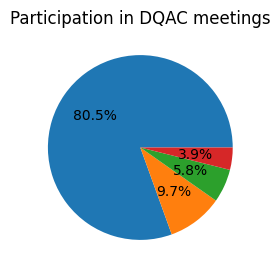

In [ ]:
#frequency of participation in DQAC meetings.
# pie chart to show  the portions of frequency of participating in DQAC meetings.

plt.figure(figsize=(5, 3))
freq_counts = data['freq_dqac'].value_counts()
plt.pie(freq_counts, autopct='%1.1f%%')
plt.title('Participation in DQAC meetings')
plt.show()

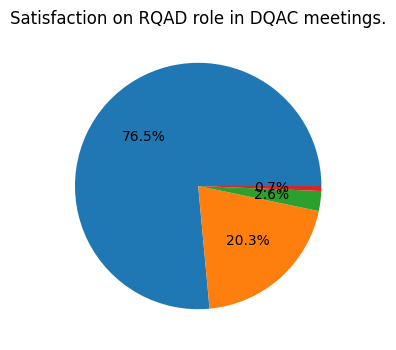

In [ ]:
#satisfaction rates of the respondent on the RQAD advisory role on DQAC meetings.
# Pie chart to show the distribution of satisfaction
plt.figure(figsize=(4, 4))
satisfaction_counts = data['sat_dqac'].value_counts()
plt.pie(satisfaction_counts,autopct='%1.1f%%')
plt.title('Satisfaction on RQAD role in DQAC meetings.')
plt.show()

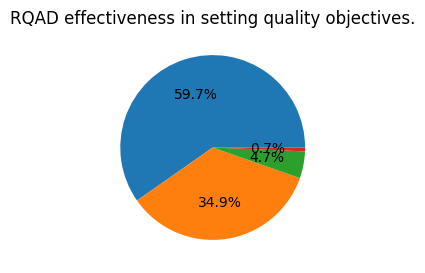

In [ ]:
#effectiveness of RQAD assisting departments on setting quality objectives.
plt.figure(figsize=(5, 3))
effectiveness_counts = data['qo_set'].value_counts()
plt.pie(effectiveness_counts,autopct='%1.1f%%')
plt.title('RQAD effectiveness in setting quality objectives.')
plt.show();

In [ ]:
# extract a column from the data. the column is "op_qa".


RQAD SUPPORT IN AUDIT PREPARATION AND QUALITY DOCUMENTATION.

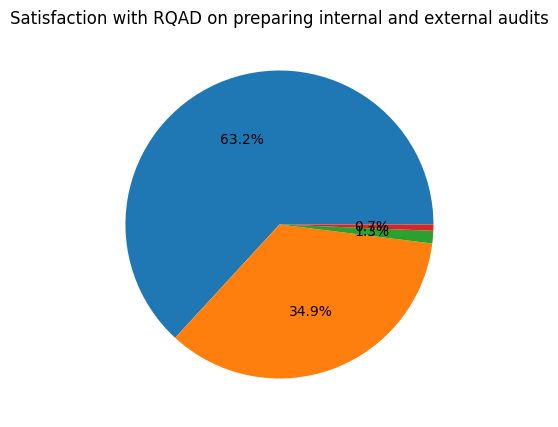

In [ ]:
#Respondent satisfaction with RQAD in preparing for internal and external audit.
plt.figure(figsize=(5, 5))
satisfaction_counts = data['prep_aud'].value_counts()
plt.pie(satisfaction_counts,autopct='%1.1f%%')
plt.title('Satisfaction with RQAD on preparing internal and external audits')
plt.show;

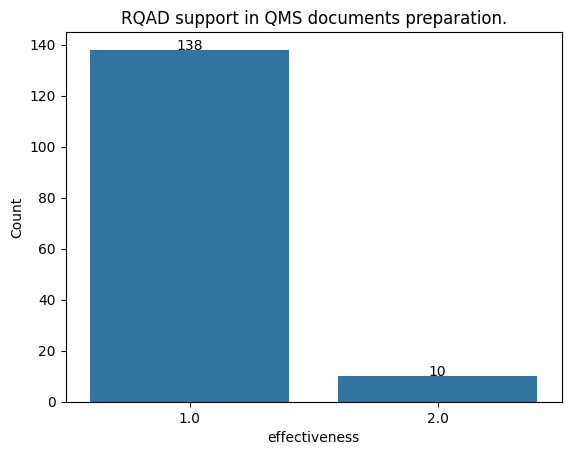

In [ ]:
#provision of support on QMS documents. Is it effective?
#count plot to show this.
sns.countplot(x='qms_docs',data=data)

# Add value labels to each bar
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',)

plt.title('RQAD support in QMS documents preparation.')
plt.xlabel('effectiveness')
plt.ylabel('Count')

plt.show()






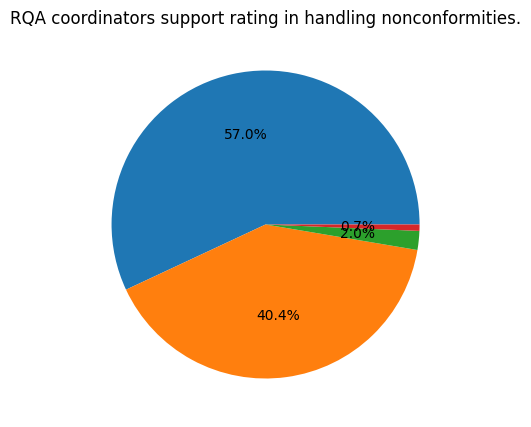

In [ ]:
#rating of RQA coordinators support in handling nonconformities.
plt.figure(figsize=(5, 5))
rating_counts = data['nc_clos'].value_counts()
plt.pie(rating_counts,autopct='%1.1f%%')
plt.title('RQA coordinators support rating in handling nonconformities.')
plt.show();

In [ ]:
#sensitization dataframe.
sensitization=data[["qms_sens___1","qms_sens___2","qms_sens___3","qms_sens___4","qms_sens___5","qms_sens___6","qms_sens___7"]]
sensitization.head()

,qms_sens___1,qms_sens___2,qms_sens___3,qms_sens___4,qms_sens___5,qms_sens___6,qms_sens___7
0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,0
3,0,0,0,1,0,0,0
4,1,1,1,1,1,1,1


RQADs ROLE IN TRAINING, COMPLIANCE, AND  RISK MANAGEMENT.

In [ ]:
#Sensitization provided by RQAD to the department.
sensitization_columns=["qms_sens___1","qms_sens___2","qms_sens___3","qms_sens___4","qms_sens___5","qms_sens___6","qms_sens___7"]
sensitization_columns.columns=['ISO','SDC','KAIZEN','RCA','GDP','QO','RM']
sensitization_counts = data[sensitization_columns].sum()

# Add data labels
for i, count in enumerate(sensitization_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.bar(sensitization_columns, sensitization_counts)
plt.xlabel('sensitization provided')
plt.ylabel('Total Count of individuals')
plt.title('total number of staff sensitized by their RQAD coordinator')
plt.show();


AttributeError: 'list' object has no attribute 'columns'

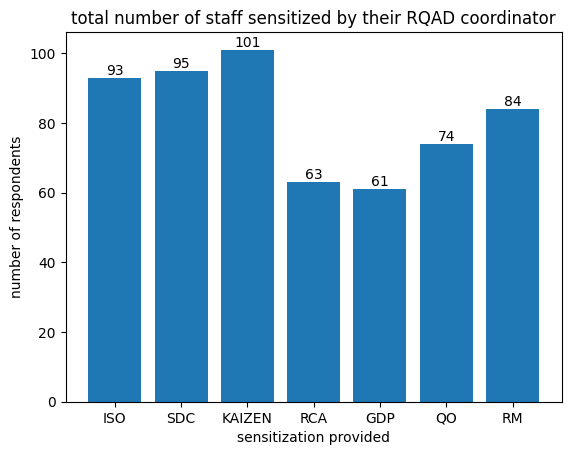

In [ ]:
#Sensitization provided by RQAD to the department.
sensitization_columns=["qms_sens___1","qms_sens___2","qms_sens___3","qms_sens___4","qms_sens___5","qms_sens___6","qms_sens___7"]
# Create a dictionary to map old column names to new names
column_mapping = {
    'qms_sens___1': 'ISO',
    'qms_sens___2': 'SDC',
    'qms_sens___3': 'KAIZEN',
    'qms_sens___4': 'RCA',
    'qms_sens___5': 'GDP',
    'qms_sens___6': 'QO',
    'qms_sens___7': 'RM'
}
# Rename columns in the DataFrame
data = data.rename(columns=column_mapping)

# Now, use the new column names
sensitization_counts = data[['ISO', 'SDC', 'KAIZEN', 'RCA', 'GDP', 'QO', 'RM']].sum()

# Add data labels
for i, count in enumerate(sensitization_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.bar(['ISO', 'SDC', 'KAIZEN', 'RCA', 'GDP', 'QO', 'RM'], sensitization_counts)
plt.xlabel('sensitization provided')
plt.ylabel('number of respondents')
plt.title('total number of staff sensitized by their RQAD coordinator')
plt.show();

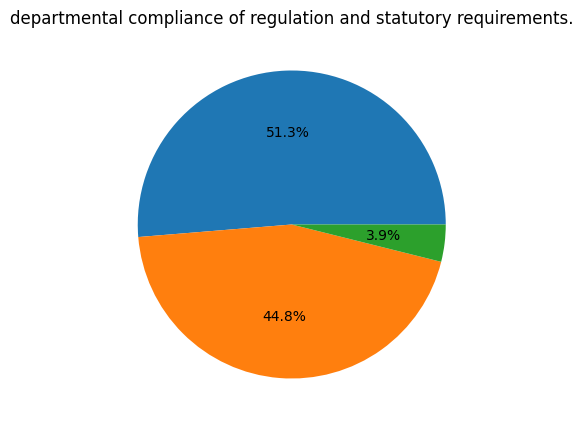

In [ ]:
#RQAD extent in promoting compliance with regulatory reqiurements.
plt.figure(figsize=(5, 5))
compliance_counts = data['compli'].value_counts()
plt.pie(compliance_counts, autopct='%1.1f%%')
plt.title('departmental compliance of regulation and statutory requirements.')
plt.show();

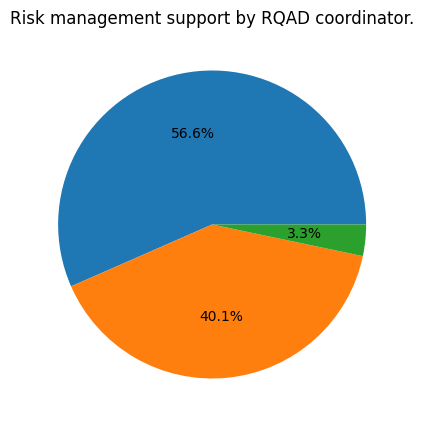

In [ ]:
#RQAD extent support on departmental risk management.
plt.figure(figsize=(5, 5))
risk_counts = data['risk'].value_counts()
plt.pie(risk_counts,autopct='%1.1f%%')
plt.title('Risk management support by RQAD coordinator.')
plt.show();

SDC MONITORING AND CUSTOMER COMPLAINT RESOLUTION.

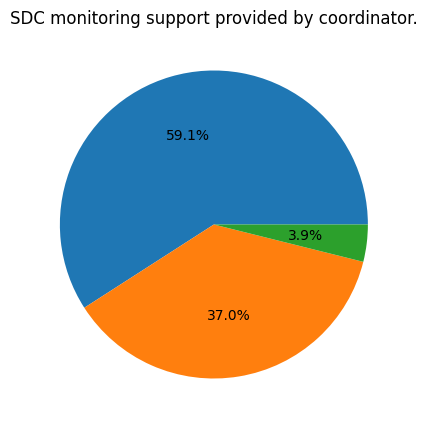

In [ ]:
#RQAD coordinator support in departmental SDC monitoring.
plt.figure(figsize=(5, 5))
monitoring_counts = data['mon_sdc'].value_counts()
plt.pie(monitoring_counts,autopct='%1.1f%%')
plt.title('SDC monitoring support provided by coordinator.')
plt.show();

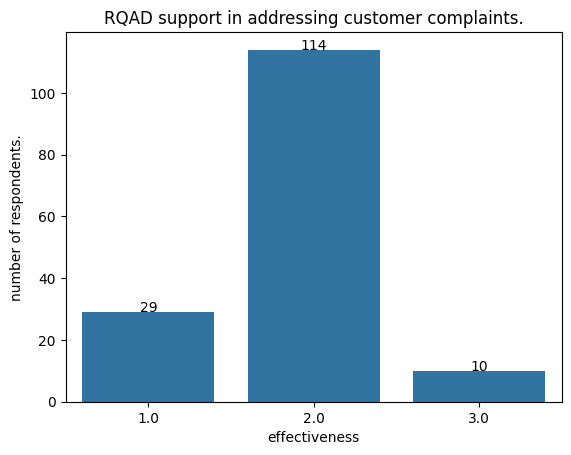

In [ ]:
sns.countplot(x='cus_comp',data=data)

# Add value labels to each bar
# Add value labels to each bar
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',)

plt.title('RQAD support in addressing customer complaints.')
plt.xlabel('effectiveness')
plt.ylabel('number of respondents.')

plt.show()

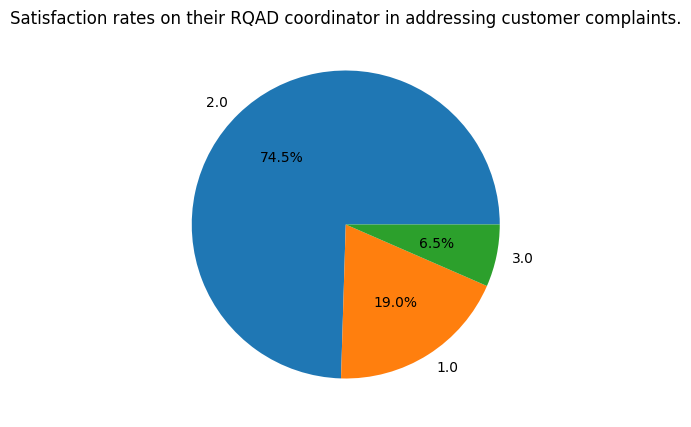

In [ ]:
#respondent satisfaction on their RQAD coordinator in addressing custommer complaints within the department.
plt.figure(figsize=(5, 5))
satisfaction_counts = data['cus_comp'].value_counts()
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%')
plt.title('Satisfaction rates on their RQAD coordinator in addressing customer complaints.')
plt.show();

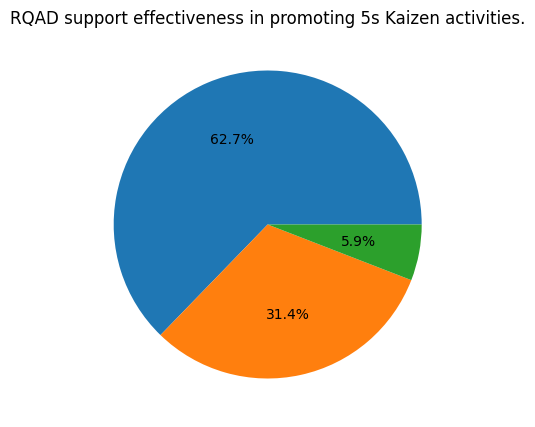

In [ ]:
#RQAD support in promoting 5s Kaizen activities.
plt.figure(figsize=(5, 5))
kaizen_counts = data['effe'].value_counts()
plt.pie(kaizen_counts,autopct='%1.1f%%')
plt.title('RQAD support effectiveness in promoting 5s Kaizen activities.')
plt.show();

In [ ]:
#additional support/activities RQAD should provide.use column "add_sup".